In [1]:
## load training and test datasets using torchvision
## define a CNN
## loss func
## train
## test

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

#设置一些超参
num_epochs = 2        #训练的周期
batch_size = 4      #批训练的数量
learning_rate = 0.001 #学习率（0.1,0.01,0.001）

In [3]:
import os
os.environ['TORCH_HOME']='D:/dataset/'
#导入训练数据
train_dataset = datasets.MNIST(root='D:/dataset/',                #数据集保存路径
                               train=True,                      #是否作为训练集
                               transform=transforms.ToTensor(), #数据如何处理, 可以自己自定义
                               download=True)                  #路径下没有的话, 可以下载           
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, #分批
                                           batch_size=batch_size,
                                           shuffle=True)          #随机分批
#导入测试数据
test_dataset = datasets.MNIST(root='D:/dataset/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True,)   
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

classes = ('0','1', '2', '3', '4',
           '5', '6', '7', '8', '9')

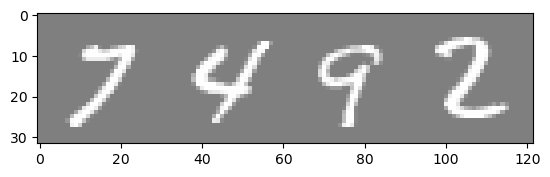

7     4     9     2    


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
##Define LeNet-5 Neural Network

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  #subsampling
        self.conv2 = nn.Conv2d(6, 16, 5)
        #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Note that the images were centered in a 28x28 image. 
        # The standard LeNet-5 assumes the image size 32x32
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


LeNet5 = Net()

In [7]:
##Define a Loss function and optimizer

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  #交叉熵损失
optimizer = optim.SGD(LeNet5.parameters(), lr=0.001, momentum=0.9)

In [9]:
##Train the network

In [10]:
for epoch in range(num_epochs):  # loop over the dataset multiple times

    # running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the images; data is a list of [images, labels]
        images, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = LeNet5(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        if (i+1) % 1000 == 0: # print every 100 mini-batches
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
        

#         running_loss += loss.item()
#         if i % 2000 == 1999:    
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#             running_loss = 0.0

print('Finished Training')

Epoch [1/2], Loss: 2.0587
Epoch [1/2], Loss: 0.0647
Epoch [1/2], Loss: 0.3830
Epoch [1/2], Loss: 0.0373
Epoch [1/2], Loss: 0.0016
Epoch [1/2], Loss: 0.1181
Epoch [1/2], Loss: 0.0008
Epoch [1/2], Loss: 0.2700
Epoch [1/2], Loss: 1.2112
Epoch [1/2], Loss: 0.8314
Epoch [1/2], Loss: 0.0032
Epoch [1/2], Loss: 0.0018
Epoch [1/2], Loss: 0.0140
Epoch [1/2], Loss: 0.0025
Epoch [1/2], Loss: 0.0169
Epoch [2/2], Loss: 0.0019
Epoch [2/2], Loss: 0.0081
Epoch [2/2], Loss: 0.0296
Epoch [2/2], Loss: 0.0013
Epoch [2/2], Loss: 0.0027
Epoch [2/2], Loss: 0.0072
Epoch [2/2], Loss: 0.0466
Epoch [2/2], Loss: 0.2040
Epoch [2/2], Loss: 0.0057
Epoch [2/2], Loss: 0.0004
Epoch [2/2], Loss: 0.1028
Epoch [2/2], Loss: 0.0043
Epoch [2/2], Loss: 0.0028
Epoch [2/2], Loss: 0.0003
Epoch [2/2], Loss: 0.0010
Finished Training


In [11]:
#quickly save our trained model
PATH = './LeNet5_net.pth'
torch.save(LeNet5.state_dict(), PATH)

In [12]:
#Test the network on the test data

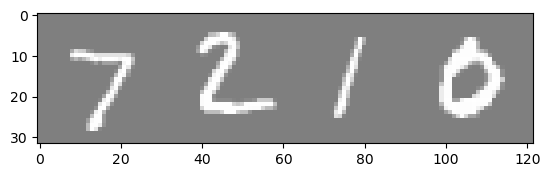

GroundTruth:  7     2     1     0    


In [13]:
#display an image from the test set to look
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [14]:
#load back in our saved model, wasn’t necessary here
LeNet5 = Net()
LeNet5.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [15]:
outputs = LeNet5(images)

In [16]:
#The outputs are energies for the 10 classes. 
#The higher the energy for a class, the more the network thinks that the image is of the particular class. 
#So, let’s get the index of the highest energy:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  7     2     1     0    


In [17]:
#Let us look at how the network performs on the whole dataset.
#model.eval()  #测试模式，关闭正则化
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = LeNet5(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %


In [18]:
# what are the classes that performed well, and the classes that did not perform well:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = LeNet5(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 99.6 %
Accuracy for class: 1     is 99.3 %
Accuracy for class: 2     is 99.0 %
Accuracy for class: 3     is 97.9 %
Accuracy for class: 4     is 98.3 %
Accuracy for class: 5     is 99.1 %
Accuracy for class: 6     is 96.1 %
Accuracy for class: 7     is 97.5 %
Accuracy for class: 8     is 98.0 %
Accuracy for class: 9     is 98.0 %


In [19]:
#Use PyTorch Profiler to characterize 
#execution time and memory consumption
from torch.profiler import profile, record_function, ProfilerActivity

#Using profiler to analyze execution time
with profile(activities=[ProfilerActivity.CPU], record_shapes=True) as prof:
    #with record_function("model_inference"):
        LeNet5(images)
        
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                             Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                     aten::conv2d         2.25%      20.000us        61.26%     544.000us     272.000us             2  
                aten::convolution         6.76%      60.000us        59.01%     524.000us     262.000us             2  
               aten::_convolution         3.04%      27.000us        52.25%     464.000us     232.000us             2  
         aten::mkldnn_convolution        46.96%     417.000us        49.21%     437.000us     218.500us             2  
                     aten::linear         1.24%      11.000us        15.43%     137.000us      45.667us             3  
                 aten::max_pool2d       

In [20]:
print(prof.key_averages(group_by_input_shape=True).table(sort_by="cpu_time_total", row_limit=10))

---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  --------------------------------------------------------------------------------  
                             Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls                                                                      Input Shapes  
---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  --------------------------------------------------------------------------------  
                     aten::conv2d         1.58%      14.000us        32.88%     292.000us     292.000us             1                               [[4, 1, 28, 28], [6, 1, 5, 5], [6], [], [], [], []]  
                aten::convolution         4.28%      38.000us        31.31%     278.000us     278.000us             1                       [[4, 1, 28, 28], [6, 1, 5, 5], [6], [], [], [], [], 

In [23]:
#Using profiler to analyze memory consumption

with profile(activities=[ProfilerActivity.CPU],
        profile_memory=True, record_shapes=True) as prof:
    with record_function("model_inference"):
        LeNet5(images)

# print(prof.key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))


---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                             Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                  model_inference        29.95%     451.000us       100.00%       1.506ms       1.506ms           0 b    -239.53 Kb             1  
                     aten::conv2d         0.80%      12.000us        40.90%     616.000us     308.000us      70.00 Kb           0 b             2  
                aten::convolution         3.05%      46.000us        40.11%     604.000us     302.000us      70.00 Kb           0 b             2  
               aten::_convolution         1.53%      23.000us        37.05%     558.000us     279.000us      70.